### Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = r'..\data\Loan_status_2007-2020Q3.gzip'
df = pd.read_csv(path, low_memory=False)

In [ ]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
df.shape

(2925493, 142)

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [ ]:
# Basic cleaning: drop unnecessary columns
drop_cols = ['Unnamed: 0', 'id', 'url', 'policy_code', 'title', 'zip_code']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

In [ ]:
# Basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 136 entries, loan_amnt to debt_settlement_flag
dtypes: float64(105), object(31)
memory usage: 3.0+ GB


In [ ]:
# Basic statistics about numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2925492.0,15358.775105,9478.383451,500.00,8000.0000,13000.00000,20000.0000,4.000000e+04
funded_amnt,2925492.0,15354.704909,9477.144689,500.00,8000.0000,13000.00000,20000.0000,4.000000e+04
funded_amnt_inv,2925492.0,15340.046287,9480.634495,0.00,8000.0000,13000.00000,20000.0000,4.000000e+04
installment,2925492.0,452.391358,272.947849,4.93,253.5000,382.30000,603.9200,1.719830e+03
annual_inc,2925488.0,79937.274015,111747.608710,0.00,47000.0000,66000.00000,95000.0000,1.100000e+08
...,...,...,...,...,...,...,...,...
hardship_length,143638.0,2.233427,0.565689,0.00,2.0000,2.00000,2.0000,4.000000e+00
hardship_dpd,143637.0,2.323148,6.179453,0.00,0.0000,0.00000,0.0000,8.200000e+01
orig_projected_additional_accrued_interest,179240.0,369.367460,468.696526,0.00,104.2800,249.47442,482.5325,1.158182e+04
hardship_payoff_balance_amount,182076.0,11993.128927,9162.902724,0.00,4749.1425,9967.16000,17640.6700,4.213555e+04


In [ ]:
# Convert dates
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
             'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Create year & quarter
df['year'] = df['issue_d'].dt.year  
df['quarter'] = df['issue_d'].dt.to_period('Q')

In [ ]:
# Missing values analysis
missing = df.isnull().mean().sort_values(ascending=False)
print("Top Missing Values:")
print(missing.head(20))
 

Top Missing Values:
hardship_loan_status                          0.950979
hardship_reason                               0.950903
hardship_status                               0.950902
hardship_dpd                                  0.950902
deferral_term                                 0.950901
hardship_type                                 0.950901
payment_plan_start_date                       0.950901
hardship_end_date                             0.950901
hardship_length                               0.950901
hardship_start_date                           0.950901
orig_projected_additional_accrued_interest    0.938732
hardship_last_payment_amount                  0.937762
hardship_payoff_balance_amount                0.937762
hardship_amount                               0.937762
sec_app_revol_util                            0.933486
verification_status_joint                     0.933417
revol_bal_joint                               0.932380
sec_app_inq_last_6mths                       

In [ ]:
# Target Variable Engineering
def label_default(x):
    if isinstance(x, str) and (
        'Charged Off' in x or 'Default' in x or 
        'Does not meet the credit policy. Status:Charged Off' in x
    ):
        return 1
    else:
        return 0

df['is_default'] = df['loan_status'].apply(label_default)
print(df['is_default'].value_counts(normalize=True))

is_default
0    0.875665
1    0.124335
Name: proportion, dtype: float64


In [ ]:
# Univariate Analysis
num_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'installment']
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amnt,2925492.0,15358.775105,9478.383451,500.00,8000.00,13000.0,20000.00,4.000000e+04
annual_inc,2925488.0,79937.274015,111747.608710,0.00,47000.00,66000.0,95000.00,1.100000e+08
dti,2922384.0,19.296480,15.719773,-1.00,12.08,18.1,24.88,9.990000e+02
fico_range_low,2925492.0,700.511030,33.765652,610.00,675.00,695.0,720.00,8.450000e+02
installment,2925492.0,452.391358,272.947849,4.93,253.50,382.3,603.92,1.719830e+03


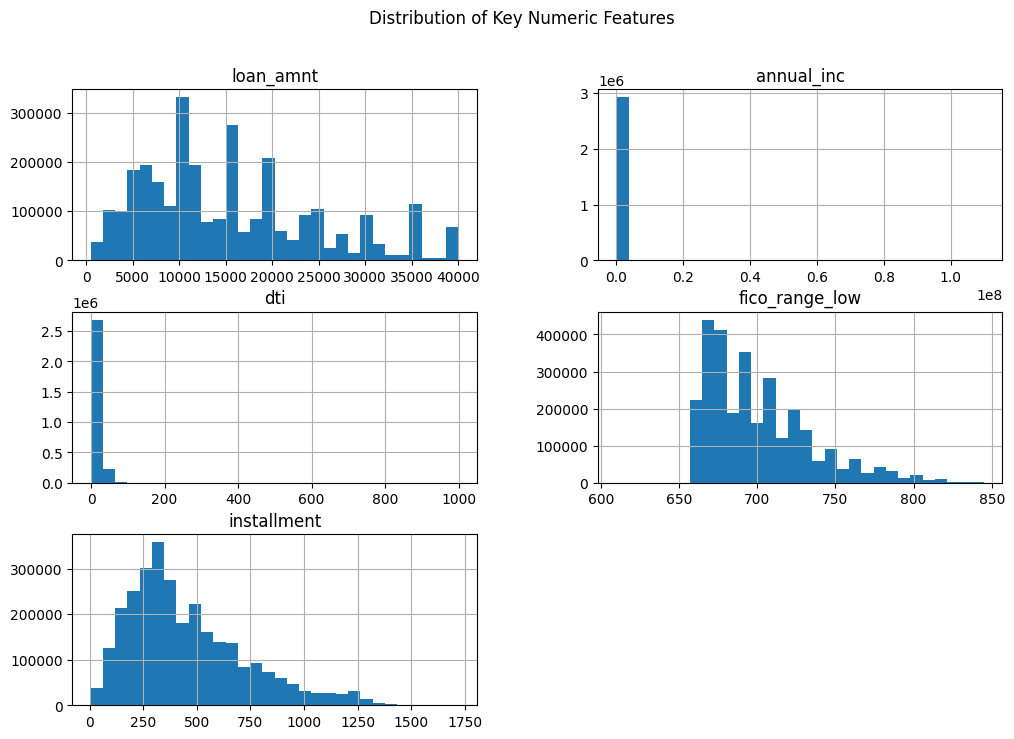

In [ ]:
df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle('Distribution of Key Numeric Features')
plt.show()

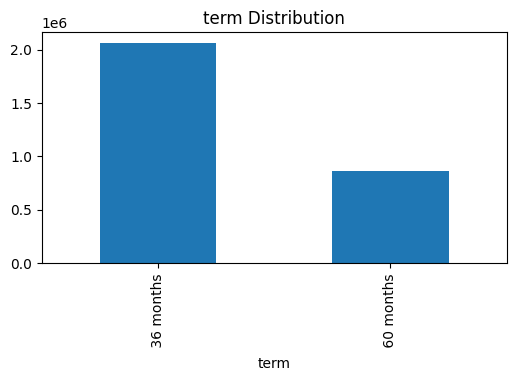

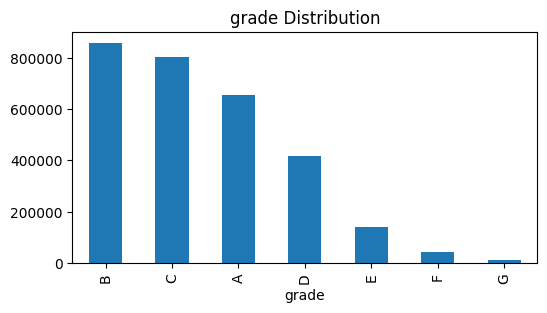

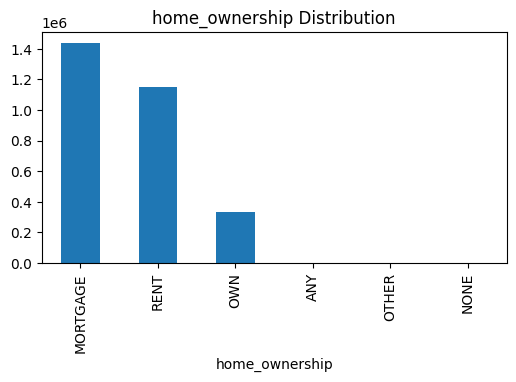

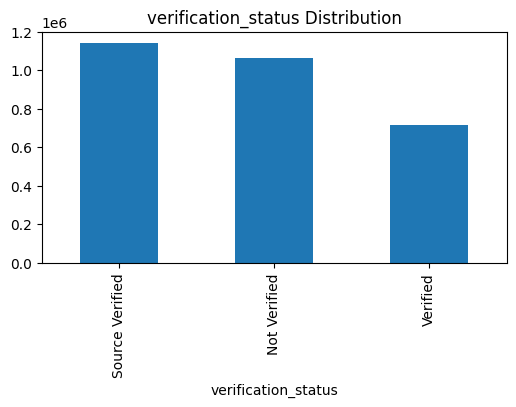

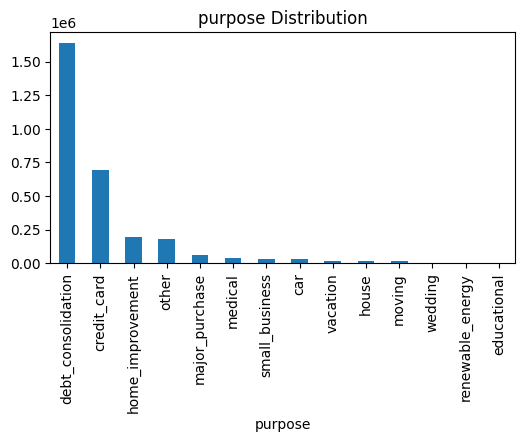

In [ ]:
cat_cols = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose']
for col in cat_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.show()

In [ ]:
# Clean numeric percentage columns
if df['int_rate'].dtype == 'object':
    df['int_rate'] = df['int_rate'].str.replace('%', '', regex=False).astype(float)

if 'revol_util' in df.columns and df['revol_util'].dtype == 'object':
    df['revol_util'] = df['revol_util'].str.replace('%', '', regex=False).astype(float)

Text(0.5, 1.0, 'Default Rate by Home Ownership')

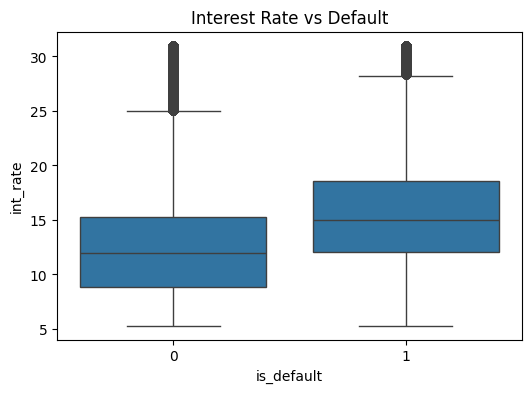

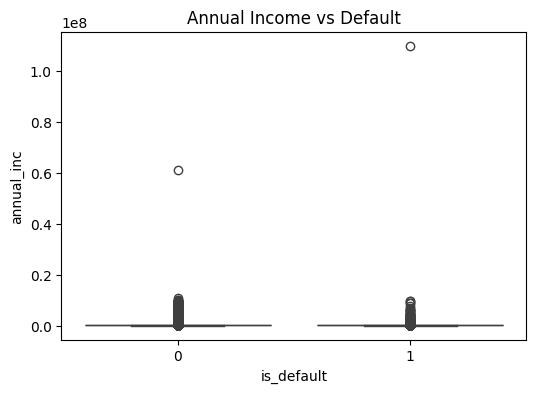

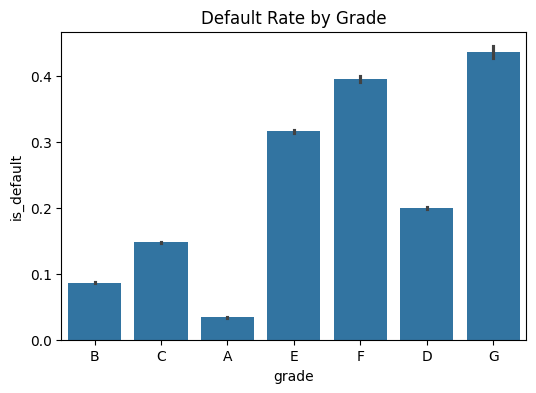

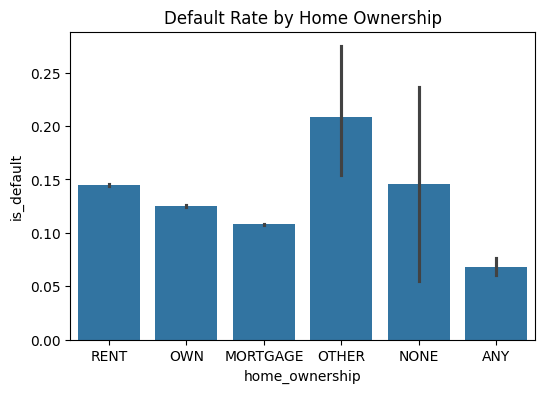

In [ ]:
# Bivariate Analysis - Numeric vs Target
plt.figure(figsize=(6,4))
sns.boxplot(x='is_default', y='int_rate', data=df)
plt.title("Interest Rate vs Default")

plt.figure(figsize=(6,4))
sns.boxplot(x='is_default', y='annual_inc', data=df)
plt.title("Annual Income vs Default")

plt.figure(figsize=(6,4))
sns.barplot(x='grade', y='is_default', data=df, estimator=np.mean)
plt.title("Default Rate by Grade")

plt.figure(figsize=(6,4))
sns.barplot(x='home_ownership', y='is_default', data=df, estimator=np.mean)
plt.title("Default Rate by Home Ownership")

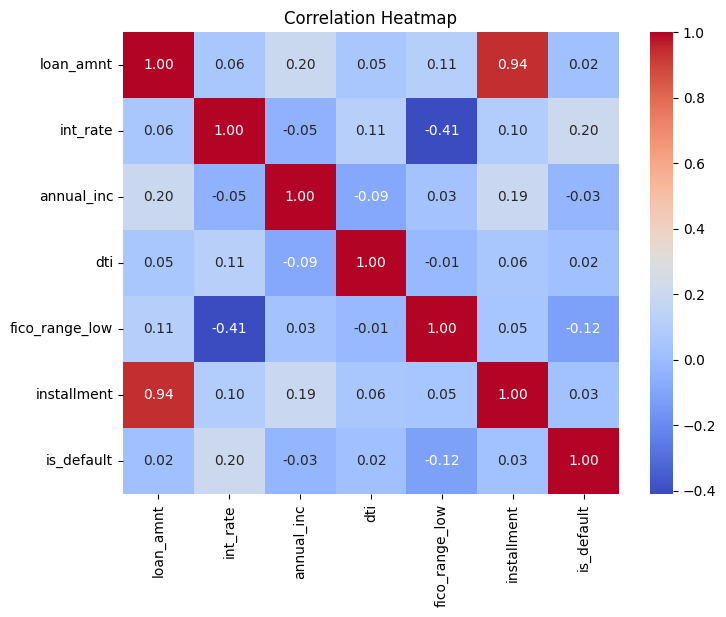

In [ ]:
# Correlation Heatmap
corr = df[num_cols + ['is_default']].corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

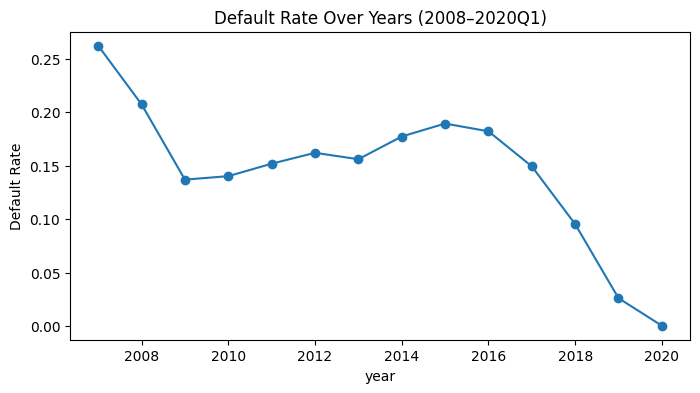

In [ ]:
# Temporal Trends
defaults_by_year = df.groupby('year')['is_default'].mean()
plt.figure(figsize=(8,4))
defaults_by_year.plot(marker='o')
plt.title("Default Rate Over Years (2008–2020Q1)")
plt.ylabel("Default Rate")
plt.show()

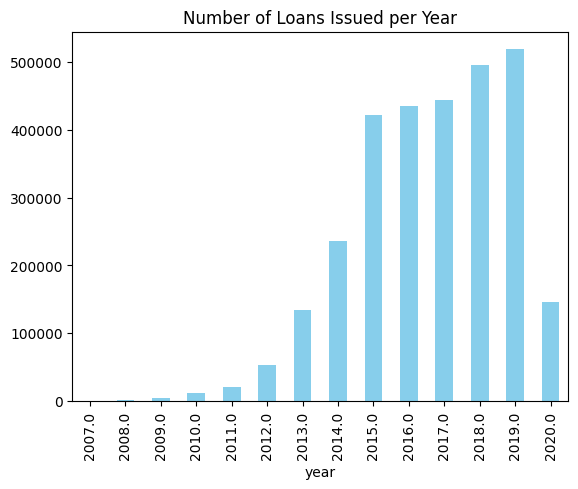

In [ ]:
loan_volume = df.groupby('year')['loan_amnt'].count()
loan_volume.plot(kind='bar', color='skyblue', title="Number of Loans Issued per Year")
plt.show()

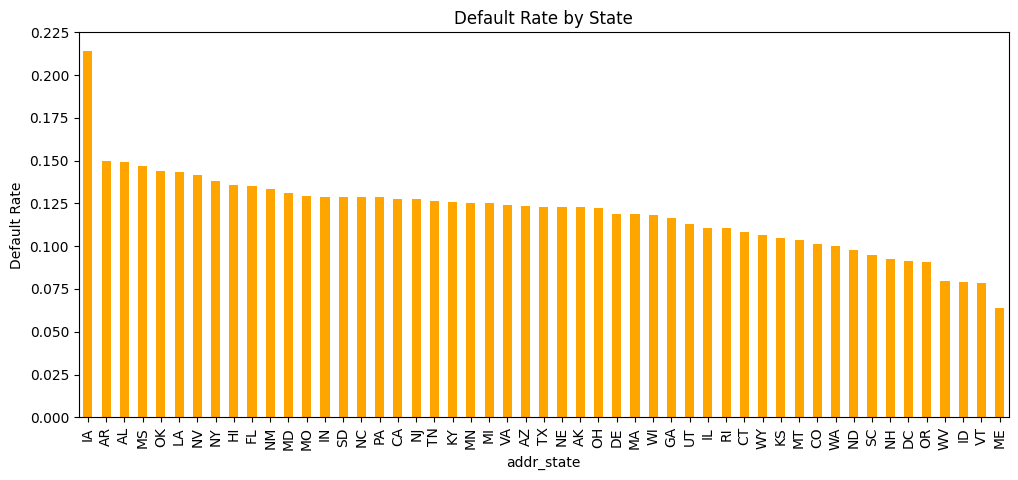

In [ ]:
# Regional Analysis
state_defaults = df.groupby('addr_state')['is_default'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
state_defaults.plot(kind='bar', color='orange')
plt.title("Default Rate by State")
plt.ylabel("Default Rate")
plt.show()

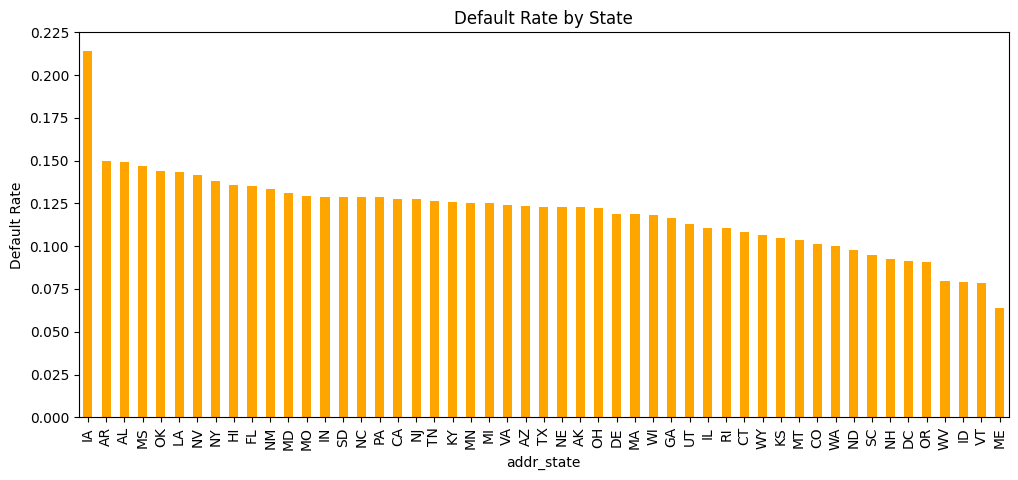

In [ ]:
# Regional Analysis
state_defaults = df.groupby('addr_state')['is_default'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
state_defaults.plot(kind='bar', color='orange')
plt.title("Default Rate by State")
plt.ylabel("Default Rate")
plt.show()

Text(0.5, 1.0, 'Annual Income Outliers')

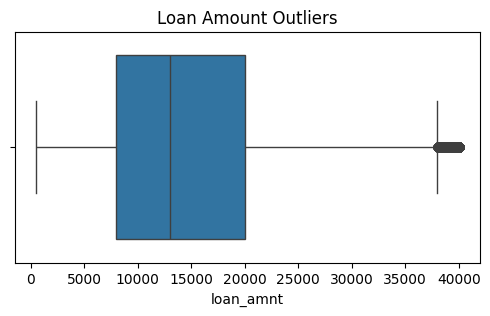

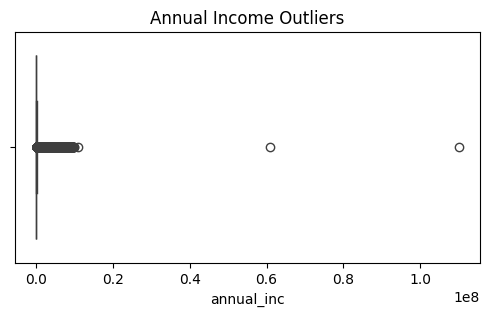

In [ ]:
# Outlier Inspection
plt.figure(figsize=(6,3))
sns.boxplot(x=df['loan_amnt'])
plt.title("Loan Amount Outliers")

plt.figure(figsize=(6,3))
sns.boxplot(x=df['annual_inc'])
plt.title("Annual Income Outliers")

In [ ]:
df['annual_inc_log'] = np.log1p(df['annual_inc'])

In [ ]:
corr_matrix = df.corr(numeric_only=True)
high_corr_pairs = [
    (i, j, corr_matrix.loc[i, j])
    for i in corr_matrix.columns for j in corr_matrix.columns
    if (abs(corr_matrix.loc[i, j]) > 0.8) and (i != j)
]
print("Highly Correlated Feature Pairs (>0.8):")
print(high_corr_pairs)

Highly Correlated Feature Pairs (>0.8):
[('loan_amnt', 'funded_amnt', np.float64(0.9998221869685998)), ('loan_amnt', 'funded_amnt_inv', np.float64(0.999299070951188)), ('loan_amnt', 'installment', np.float64(0.9435790499326339)), ('funded_amnt', 'loan_amnt', np.float64(0.9998221869685998)), ('funded_amnt', 'funded_amnt_inv', np.float64(0.9995197161249864)), ('funded_amnt', 'installment', np.float64(0.943825275612606)), ('funded_amnt_inv', 'loan_amnt', np.float64(0.999299070951188)), ('funded_amnt_inv', 'funded_amnt', np.float64(0.9995197161249864)), ('funded_amnt_inv', 'installment', np.float64(0.9431864264912766)), ('installment', 'loan_amnt', np.float64(0.9435790499326339))]


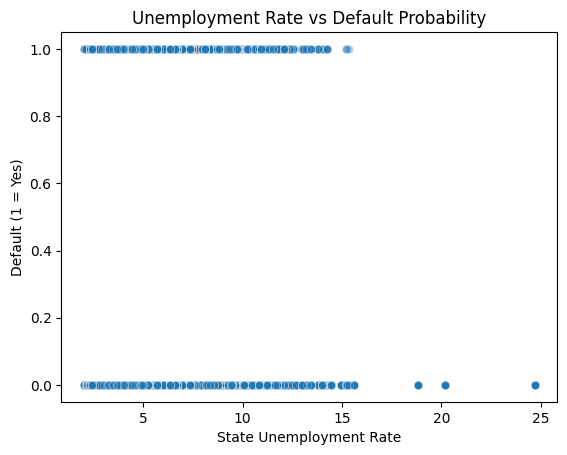

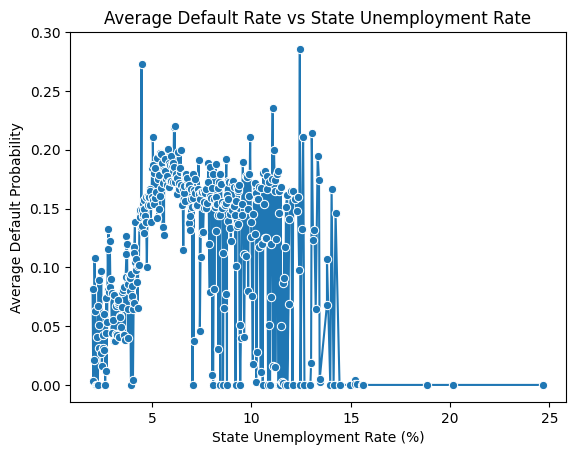

In [ ]:
path = r'..\data\unemployment_rate_by_state.csv'
fred_df = pd.read_csv(path)
fred_df['DATE'] = pd.to_datetime(fred_df['DATE'])
fred_df['year'] = fred_df['DATE'].dt.year
fred_df['quarter_num'] = ((fred_df['DATE'].dt.month - 1) // 3 + 1)
fred_df['quarter'] = fred_df['year'].astype(str) + 'Q' + fred_df['quarter_num'].astype(str)

fred_q = fred_df.groupby(['addr_state', 'quarter'], as_index=False)['unemployment_rate'].mean()


df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
df['year'] = df['issue_d'].dt.year
df['quarter_num'] = ((df['issue_d'].dt.month - 1) // 3 + 1)
df['quarter'] = df['year'].astype(str) + 'Q' + df['quarter_num'].astype(str)
df['quarter'] = df['quarter'].astype(str)
df['quarter'] = df['quarter'].str.replace('.0', '', regex=False)

merged_df = pd.merge(df, fred_q, how='left', on=['addr_state', 'quarter'])

merged_df['is_default'] = merged_df['loan_status'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)

sns.scatterplot( y='is_default',x='unemployment_rate', data=merged_df, alpha=0.3)
plt.title("Unemployment Rate vs Default Probability")
plt.xlabel("State Unemployment Rate")
plt.ylabel("Default (1 = Yes)")
plt.show()
avg_default = merged_df.groupby('unemployment_rate')['is_default'].mean().reset_index()

sns.lineplot(x='unemployment_rate', y='is_default', data=avg_default, marker='o')
plt.title("Average Default Rate vs State Unemployment Rate")
plt.xlabel("State Unemployment Rate (%)")
plt.ylabel("Average Default Probability")
plt.show()